<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Contents: Computer Vision Project - 1
1. [Part-A: Solution](#Part-A:-Solution)
2. [Part-B: Solution](#Part-B:-Solution)

# Part-A: Solution

- **DOMAIN:** Botanical Research
- **CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.
- **DATA DESCRIPTION:** The dataset comprises of images from 12 plant species.
Source: https://www.kaggle.com/c/plant-seedlings-classification/data.
- **PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo.

In [1]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline

from scipy import stats
from scipy.stats import zscore

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, plot_roc_curve 

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

import cv2
from google.colab.patches import cv2_imshow
from glob import glob
import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Activation,GlobalMaxPool2D,GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam,RMSprop
from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

import random

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import and Understand the data

### 1A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python.

In [3]:
# Set the path to the dataset folder. (The dataset contains image folder: "train")
train_path = "/content/drive/MyDrive/MGL/Project-CV-1/plant-seedlings-classification.zip"

# Extract the files from dataset to train_temp
from zipfile import ZipFile
with ZipFile(train_path, 'r') as zip:
  zip.extractall('/content/drive/MyDrive/MGL/Project-CV-1/unzip-psc')

### 1B. Map the images from train folder with train labels to form a DataFrame.
- Using Numpy array instead of dataframe as it is faster for image processing.
- Converting images into numpy arrays is important, as the model accepts inputs in the form of numpy arrays.

In [4]:
# The path to all images in training set. (* means include all folders and files.)
path = "/content/drive/MyDrive/MGL/Project-CV-1/unzip-psc/plant-seedlings-classification/train/*/*.png"  
files = glob(path)

# Initialize empty list to store the image data as numbers.
X = []
# Initialize empty list to store the labels of images
y = [] 
j = 1
num = len(files)

# Collect images and labels in X and y
for img in files:
    '''
    Append the image data to X list.
    Append the labels to y list.
    '''
    print(str(j) + "/" + str(num), end="\r")
    # Get image (with resizing to 128 x 128)
    X.append(cv2.resize(cv2.imread(img), (128, 128))) 
    # Get image label (folder name contains the class to which the image belongs) 
    y.append(img.split('/')[-2])  
    j += 1

# Train images set
X = np.asarray(X) 
# Train labels set 
y = pd.DataFrame(y)  

In [5]:
# # Save the data
# np.save('/content/drive/MyDrive/MGL/Project-CV-1/X.npy', X)
# y.to_pickle('/content/drive/MyDrive/MGL/Project-CV-1/X.pkl')

In [6]:
# # Load the data
# X = np.load('/content/drive/MyDrive/MGL/Project-CV-1/X.npy')
# y = pd.read_pickle('/content/drive/MyDrive/MGL/Project-CV-1/X.pkl')

In [7]:
print(X.shape)
print(y.shape)

(4750, 128, 128, 3)
(4750, 1)


In [8]:
y[0].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: 0, dtype: int64

### 1C. Write a function that will select n random images and display images along with its species.

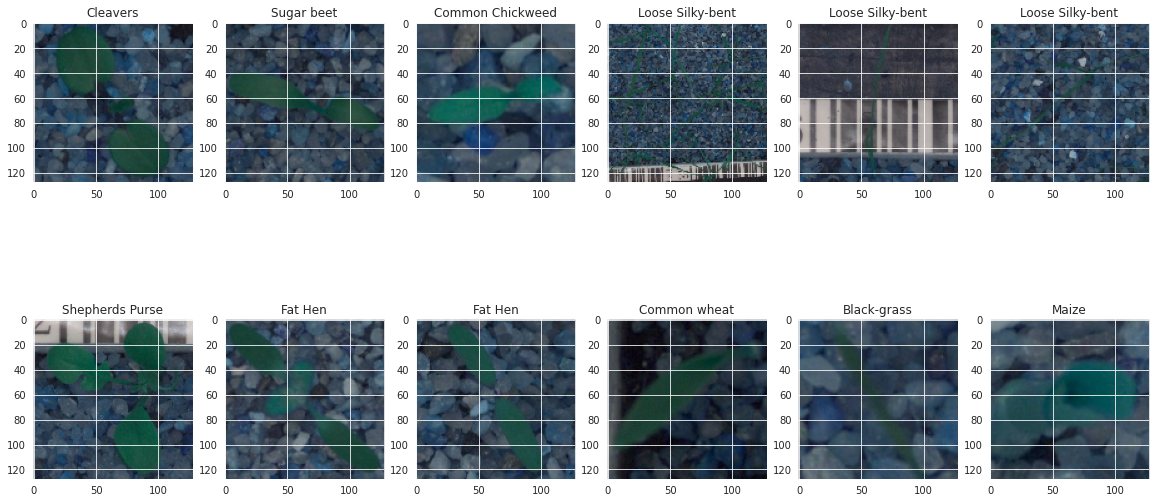

In [9]:
def random_images():
  r = random.randint(1, 200)

  f = plt.figure(figsize=(20, 20))

  f.add_subplot(2, 6, 1)
  plt.imshow(X[0+r])
  plt.title(y[0][0+r])

  f.add_subplot(2, 6, 2)
  plt.imshow(X[400+r])
  plt.title(y[0][400+r])

  f.add_subplot(2, 6, 3)
  plt.imshow(X[750+r])
  plt.title(y[0][750+r])
  
  f.add_subplot(2, 6, 4)
  plt.imshow(X[1300+r])
  plt.title(y[0][1300+r])

  f.add_subplot(2, 6, 5)
  plt.imshow(X[1700+r])
  plt.title(y[0][1700+r])

  f.add_subplot(2, 6, 6)
  plt.imshow(X[1600+r])
  plt.title(y[0][1600+r])

  f.add_subplot(1, 6, 1)
  plt.imshow(X[2400+r])
  plt.title(y[0][2400+r])

  f.add_subplot(1, 6, 2)
  plt.imshow(X[2630+r])
  plt.title(y[0][2630+r])

  f.add_subplot(1, 6, 3)
  plt.imshow(X[3000+r])
  plt.title(y[0][3000+r])
  
  f.add_subplot(1, 6, 4)
  plt.imshow(X[3200+r])
  plt.title(y[0][3200+r])

  f.add_subplot(1, 6, 5)
  plt.imshow(X[3538+r])
  plt.title(y[0][3538+r])

  f.add_subplot(1, 6, 6)
  plt.imshow(X[4500+r])
  plt.title(y[0][4500+r])

# Using the function to display 12 random images
random_images()

## 2. Data preprocessing

### 2A. Create X & Y from the DataFrame.

In [10]:
# This is completed in part 1B above.

### 2B. Encode labels of the images.

In [11]:
# Using LabelEncoder from preprocessing
labels = preprocessing.LabelEncoder()
labels.fit(y[0])
print('Classes'+str(labels.classes_))

Classes['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


In [12]:
encodedLabel = labels.transform(y[0])
convertedLabels = np_utils.to_categorical(encodedLabel)
classes = convertedLabels.shape[1]
print(str(classes))

12


### 2C. Unify shape of all the images.

In [13]:
# This is completed in part 1B above.
# All images have been resized to (128, 128, 3).

### 2D. Normalise all the images.

In [14]:
# Normalization of images
X = X.astype('float32') / 255.0

## 3. Model training
- 3A. Split the data into train and test data.
- 3B. Create new CNN architecture to train the model
- 3C. Train the model on train data and validate on test data.
- 3D. Select a random image and print actual label and predicted label for the same.

> Due to time constraint, I am using small number of epochs, and training only the model-1. Similar process can be replicated for other complex models (From Model-2 to Model-5).

In [15]:
# Shape of the dataset
print(X.shape)
print(y.shape)

(4750, 128, 128, 3)
(4750, 1)


In [16]:
# Split X and y into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, convertedLabels, test_size=0.3, random_state=0, stratify=convertedLabels)

In [17]:
# Shape of train and test datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [18]:
labels.classes_[0], labels.classes_[1], labels.classes_[11]

('Black-grass', 'Charlock', 'Sugar beet')

In [19]:
labels.classes_

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

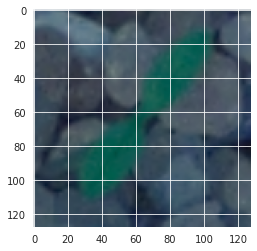

In [20]:
plt.imshow(X_train[0])

In [21]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

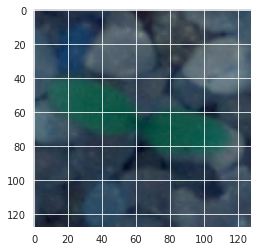

In [22]:
plt.imshow(X_test[0])

In [23]:
y_test[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Model-1
- 2 convolution layers ( filters=64 / 128 , kernel_size=(3, 3) activation='relu')
- MaxPool2D((2, 2)
- Dropout(0.25)
- Flatten
- 2 dense layers (128 / 64, activation='relu')
- Dropout(0.25)
- loss='categorical_crossentropy', optimizer='adam'
- model compile with ImageDataGenerator to minimize overfitting.
- shuffle = True

In [24]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [25]:
model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPool2D((2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.25))

model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.25))

model1.add(Dense(classes, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 128)       0

In [26]:
history1 = model1.fit(generator.flow(X_train,y_train,batch_size=200), epochs=50, verbose=2, shuffle=True, validation_data=(X_test,y_test))
pd.DataFrame(history1.history)

Epoch 1/50
17/17 - 209s - loss: 2.6994 - accuracy: 0.1053 - val_loss: 2.4601 - val_accuracy: 0.1046 - 209s/epoch - 12s/step
Epoch 2/50
17/17 - 211s - loss: 2.4540 - accuracy: 0.1287 - val_loss: 2.4256 - val_accuracy: 0.2765 - 211s/epoch - 12s/step
Epoch 3/50
17/17 - 205s - loss: 2.3883 - accuracy: 0.1832 - val_loss: 2.2750 - val_accuracy: 0.2428 - 205s/epoch - 12s/step
Epoch 4/50
17/17 - 200s - loss: 2.2630 - accuracy: 0.2241 - val_loss: 2.1172 - val_accuracy: 0.2646 - 200s/epoch - 12s/step
Epoch 5/50
17/17 - 204s - loss: 2.1503 - accuracy: 0.2517 - val_loss: 1.9697 - val_accuracy: 0.2835 - 204s/epoch - 12s/step
Epoch 6/50
17/17 - 202s - loss: 2.0408 - accuracy: 0.2644 - val_loss: 1.8675 - val_accuracy: 0.3116 - 202s/epoch - 12s/step
Epoch 7/50
17/17 - 204s - loss: 1.9725 - accuracy: 0.2875 - val_loss: 1.7994 - val_accuracy: 0.3291 - 204s/epoch - 12s/step
Epoch 8/50
17/17 - 206s - loss: 1.9066 - accuracy: 0.3242 - val_loss: 1.7073 - val_accuracy: 0.4168 - 206s/epoch - 12s/step
Epoch 9/

loss  accuracy  val_loss  val_accuracy
0   2.699441  0.105263  2.460149      0.104561
1   2.453981  0.128722  2.425604      0.276491
2   2.388316  0.183158  2.275042      0.242807
3   2.263000  0.224060  2.117186      0.264561
4   2.150331  0.251729  1.969655      0.283509
5   2.040815  0.264361  1.867471      0.311579
6   1.972471  0.287519  1.799362      0.329123
7   1.906564  0.324211  1.707271      0.416842
8   1.855207  0.344060  1.639012      0.468070
9   1.779057  0.375639  1.593907      0.484211
10  1.731201  0.387669  1.533185      0.494737
11  1.712253  0.396692  1.554253      0.477193
12  1.654895  0.408722  1.445120      0.527018
13  1.620960  0.429173  1.412478      0.539649
14  1.630711  0.421353  1.360565      0.539649
15  1.587285  0.440601  1.451784      0.508772
16  1.584279  0.443609  1.502104      0.483509
17  1.595046  0.445113  1.432792      0.524912
18  1.537174  0.455639  1.373236      0.546667
19  1.538957  0.451729  1.416279      0.545965
20  1.516031  0.464962  1.413470      0.529123
21  1.497383  0.472481  1.419745      0.521403
22  1.495136  0.473083  1.313640      0.562807
23  1.498047  0.478797  1.410162      0.517193
24  1.498272  0.471880  1.295603      0.567018
25  1.455293  0.488120  1.310506      0.568421
26  1.449106  0.485414  1.275987      0.581754
27  1.436789  0.501955  1.231126      0.592982
28  1.430310  0.501053  1.363055      0.540351
29  1.449984  0.496842  1.364147      0.536842
30  1.452696  0.487820  1.180346      0.614737
31  1.425145  0.497143  1.248036      0.574737
32  1.364349  0.520902  1.196798      0.597895
33  1.360124  0.520301  1.161936      0.617544
34  1.387362  0.505564  1.175725      0.614035
35  1.339469  0.535940  1.214247      0.595789
36  1.311847  0.539850  1.198147      0.617544
37  1.335180  0.543759  1.162438      0.625263
38  1.307360  0.551278  1.215080      0.595088
39  1.299950  0.547368  1.288730      0.560702
40  1.279231  0.549774  1.120554      0.645614
41  1.288534  0.555188  1.169995      0.614035
42  1.257393  0.565714  1.058822      0.658947
43  1.228451  0.561805  1.034582      0.658246
44  1.210798  0.579549  1.065235      0.649825
45  1.225574  0.573534  1.016358      0.677895
46  1.198300  0.580752  0.965505      0.681404
47  1.181645  0.585865  0.966233      0.679298
48  1.166720  0.599699  1.045205      0.649123
49  1.151458  0.594586  1.023830      0.657544

45/45 [==============================] - 18s 405ms/step - loss: 1.0238 - accuracy: 0.6575


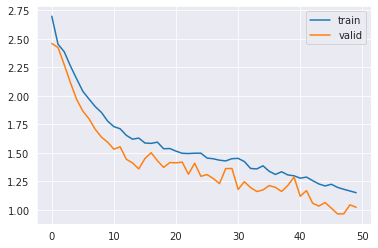

In [27]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# Printing results
results = model1.evaluate(X_test, y_test)

45/45 [==============================] - 18s 405ms/step - loss: 1.0238 - accuracy: 0.6575


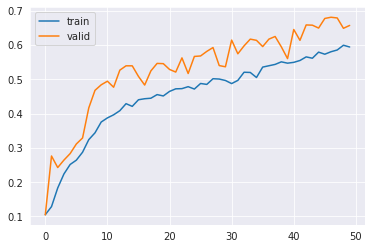

In [28]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history1.history)
hist['epoch'] = history1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)

# Printing results
results = model1.evaluate(X_test, y_test)

In [29]:
y_pred=model1.predict(X_test)
y_pred

45/45 [==============================] - 18s 404ms/step


array([[1.7538852e-04, 2.9225720e-04, 5.8182035e-05, ..., 4.0803514e-02,
        1.3137973e-02, 1.4122833e-03],
       [1.1852717e-03, 7.9621606e-02, 2.2754803e-01, ..., 8.8252835e-03,
        1.8610634e-02, 4.2275268e-01],
       [5.5335499e-06, 1.7435183e-06, 7.8689389e-08, ..., 1.5939398e-03,
        1.1415473e-03, 2.5502441e-05],
       ...,
       [1.1424939e-05, 6.2609111e-06, 2.7024404e-07, ..., 3.5962116e-03,
        9.6176489e-04, 4.3383185e-05],
       [4.3460182e-05, 1.4543781e-02, 2.1688105e-04, ..., 2.5651562e-01,
        1.7420383e-01, 1.3956984e-02],
       [1.7664894e-05, 1.5756009e-04, 2.9902756e-06, ..., 6.6294044e-02,
        7.0197952e-01, 2.5368039e-03]], dtype=float32)

Classification Accuracy:
104/104 [==============================] - 42s 408ms/step - loss: 1.0074 - accuracy: 0.6418
Loss and Accuracy on Training data: [1.0074156522750854, 0.6418045163154602]
45/45 [==============================] - 20s 441ms/step - loss: 1.0238 - accuracy: 0.6575
Loss and Accuracy on Test data: [1.0238300561904907, 0.6575438380241394]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.68      0.86      0.76       117
           2       0.74      0.67      0.71        86
           3       0.69      0.95      0.80       183
           4       0.78      0.64      0.70        66
           5       0.62      0.36      0.46       143
           6       0.72      0.87      0.79       196
           7       0.52      0.80      0.63        66
           8       0.58      0.63      0.60       155
           9       0.48      0.20      0.29        69
          10       0.66

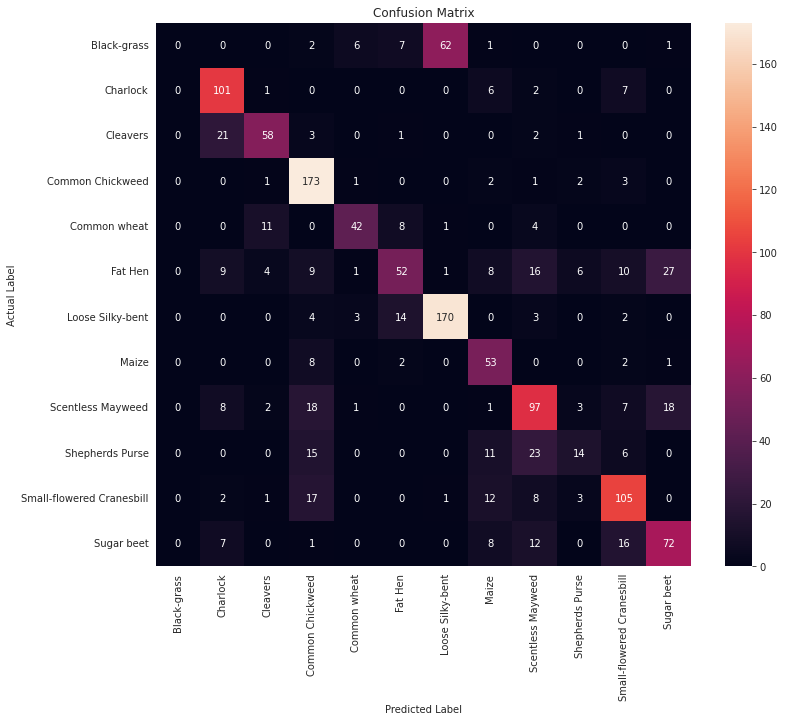

In [30]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model1.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model1.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in [labels.classes_]],  
                         columns = [i for i in [labels.classes_]])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Evaluation metrics allow us to estimate errors to determine how well our models are performing:**

> Accuracy: ratio of correct predictions over total predictions.

> Precision: how often the classifier is correct when it predicts positive.

> Recall: how often the classifier is correct for all positive instances.

> F-Score: single measurement to combine precision and recall.

**Considering the Class Recall, Precision, F1 Score and Accuracy as the most important parameters to decide the best model for this problem. We may have higher values in the below models here. Please refer the other models for the same.**
- A decent performance is visible from the above metrics.
- As evident, Model-1 is not overfitting, we can use more complex models to improve the performance.
- A Balanced dataset will be more benefcial in our case.
- The number of features in the image dataset are huge compared to the number of examples, this is a challenge for DNNs and CNNs.
- To overcome overfitting, we can use data augmentation, batch normalization, and transfer learning.

### Predicting the class of a single image:

Actual Class:  Small-flowered Cranesbill
Predicted Class:  Small-flowered Cranesbill


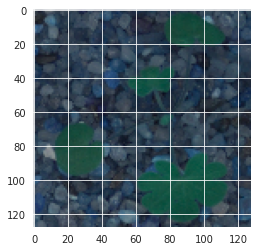

In [31]:
# Using test images from the given dataset
# Test Image as n1
n1 = 51
plt.imshow(X_test[n1])

# y_pred=model1.predict(X_test)

# Actual Class
print("Actual Class: ",labels.classes_[y_test.argmax(axis=1)[n1]])
# Predicted Class
print("Predicted Class: ",labels.classes_[y_pred.argmax(axis=1)[n1]])

**Additional Models; Not part of the Project Part-A:**

### Model-2
- 3 convolution layers (filters=64/128/128 , kernel_size=(3, 3) activation='relu')
- MaxPool2D((2, 2),
- Dropout(0.25)
- Flatten
- 1 dense layer (256, activation='relu')
- Dropout(0.5)
- loss='categorical_crossentropy', optimizer='adam'
- model compile with ImageDataGenerator to minimize overfitting.
- shuffle = True

In [32]:
# generator = ImageDataGenerator(rotation_range = 180,
#                                zoom_range = 0.2,
#                                width_shift_range = 0.2,
#                                height_shift_range = 0.2,
#                                horizontal_flip = True,
#                                vertical_flip = True)
# generator.fit(X_train)

In [33]:
# model2 = Sequential()

# model2.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
# model2.add(MaxPool2D((2, 2)))
# model2.add(Dropout(0.25))

# model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model2.add(MaxPool2D((2, 2)))
# model2.add(Dropout(0.25))

# model2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model2.add(MaxPool2D((2, 2)))
# model2.add(Dropout(0.25))

# model2.add(Flatten())

# model2.add(Dense(256, activation='relu'))
# model2.add(Dropout(0.5))

# model2.add(Dense(classes, activation='softmax'))

# model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model2.summary()

In [34]:
# history2 = model2.fit(generator.flow(X_train,y_train,batch_size=64),epochs=100, verbose=2,shuffle=True,validation_data=(X_test,y_test))
# pd.DataFrame(history2.history)

In [35]:
# # Plotting Train Loss vs Validation Loss
# plt.plot(history2.history['loss'])
# plt.plot(history2.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [36]:
# # Capturing learning history per epoch
# hist  = pd.DataFrame(history2.history)
# hist['epoch'] = history2.epoch

# # Plotting accuracy at different epochs
# plt.plot(hist['accuracy'])
# plt.plot(hist['val_accuracy'])
# plt.legend(("train" , "valid") , loc =0)

# # Printing results
# results = model2.evaluate(X_test, y_test)

In [37]:
# y_pred=model2.predict(X_test)
# y_pred

In [38]:
# # Classification Accuracy
# print("Classification Accuracy:")
# print('Loss and Accuracy on Training data:',model2.evaluate(X_train, y_train))
# print('Loss and Accuracy on Test data:',model2.evaluate(X_test, y_test))
# print()

# # Classification Report
# print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# # Confusion Matrix
# print("Confusion Matrix Chart:")
# cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# df_cm = pd.DataFrame(cm, index = [i for i in [labels.classes_]],  
#                          columns = [i for i in [labels.classes_]])
# plt.figure(figsize = (12,10))
# sns.heatmap(df_cm, annot=True, fmt='g')
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.show()

### Model-3
- 4 convolution layers (filters=64/64/128/256, kernel_size=(3, 3) activation='relu')
- MaxPool2D((2, 2)
- Dropout(0.25)
- GlobalMaxPool2D
- Flatten
- 2 dense layers (256 / 256, activation='relu')
- Dropout(0.25)
- loss='categorical_crossentropy', optimizer='adam'
- model compile with ImageDataGenerator to minimize overfitting.
- shuffle = True

In [39]:
# model3 = Sequential()

# model3.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
# model3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model3.add(MaxPool2D((2, 2)))
# model3.add(Dropout(0.25))

# model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model3.add(MaxPool2D((2, 2)))
# model3.add(Dropout(0.25))

# model3.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
# model3.add(MaxPool2D((2, 2)))
# model3.add(Dropout(0.25))

# model3.add(GlobalMaxPool2D())

# model3.add(Flatten())

# model3.add(Dense(256, activation='relu'))
# model3.add(Dropout(0.25))

# model3.add(Dense(256, activation='relu'))
# model3.add(Dropout(0.25))

# model3.add(Dense(classes, activation='softmax'))

# model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model3.summary()

In [40]:
# history3 = model3.fit(generator.flow(X_train,y_train,batch_size=64),epochs=200, verbose=2,shuffle=True,validation_data=(X_test,y_test))
# pd.DataFrame(history3.history)

In [41]:
# # Plotting Train Loss vs Validation Loss
# plt.plot(history3.history['loss'])
# plt.plot(history3.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [42]:
# # Capturing learning history per epoch
# hist  = pd.DataFrame(history3.history)
# hist['epoch'] = history3.epoch

# # Plotting accuracy at different epochs
# plt.plot(hist['accuracy'])
# plt.plot(hist['val_accuracy'])
# plt.legend(("train" , "valid") , loc =0)

# # Printing results
# results = model3.evaluate(X_test, y_test)

In [43]:
# y_pred=model3.predict(X_test)
# y_pred

In [44]:
# # Classification Accuracy
# print("Classification Accuracy:")
# print('Loss and Accuracy on Training data:',model3.evaluate(X_train, y_train))
# print('Loss and Accuracy on Test data:',model3.evaluate(X_test, y_test))
# print()

# # Classification Report
# print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# # Confusion Matrix
# print("Confusion Matrix Chart:")
# cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# df_cm = pd.DataFrame(cm, index = [i for i in [labels.classes_]],  
#                          columns = [i for i in [labels.classes_]])
# plt.figure(figsize = (12,10))
# sns.heatmap(df_cm, annot=True, fmt='g')
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.show()

### Model-4
- 6 convolution layers (filters=64/64/128/128/256/256, kernel_size=(3, 3) activation='relu')
- MaxPool2D((2, 2)
- Dropout(0.25)
- GlobalMaxPool2D
- Flatten
- 3 dense layers (256/256/256, activation='relu')
- Dropout(0.25)
- loss='categorical_crossentropy', optimizer='adam'
- model compile with ImageDataGenerator to minimize overfitting.
- shuffle = True

In [45]:
# generator = ImageDataGenerator(rotation_range = 180,
#                                zoom_range = 0.2,
#                                width_shift_range = 0.2,
#                                height_shift_range = 0.2,
#                                horizontal_flip = True,
#                                vertical_flip = True)
# generator.fit(X_train)

In [46]:
# model4 = Sequential()

# model4.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
# model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model4.add(MaxPool2D((2, 2)))
# model4.add(Dropout(0.25))

# model4.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model4.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model4.add(MaxPool2D((2, 2)))
# model4.add(Dropout(0.25))

# model4.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
# model4.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
# model4.add(MaxPool2D((2, 2)))
# model4.add(Dropout(0.25))

# model4.add(GlobalMaxPool2D())

# model4.add(Flatten())

# model4.add(Dense(256, activation='relu'))
# model4.add(Dropout(0.25))

# model4.add(Dense(256, activation='relu'))
# model4.add(Dropout(0.25))

# model4.add(Dense(256, activation='relu'))
# model4.add(Dropout(0.25))

# model4.add(Dense(classes, activation='softmax'))

# model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# model4.summary()

In [47]:
# history4 = model4.fit(generator.flow(X_train,y_train,batch_size=64),epochs=200, verbose=2,shuffle=True,validation_data=(X_test,y_test))
# pd.DataFrame(history4.history)

In [48]:
# #Plotting Train Loss vs Validation Loss
# plt.plot(history4.history['loss'])
# plt.plot(history4.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [49]:
# # Capturing learning history per epoch
# hist  = pd.DataFrame(history4.history)
# hist['epoch'] = history4.epoch

# # Plotting accuracy at different epochs
# plt.plot(hist['accuracy'])
# plt.plot(hist['val_accuracy'])
# plt.legend(("train" , "valid") , loc =0)

# # Printing results
# results = model4.evaluate(X_test, y_test)

In [50]:
# y_pred=model4.predict(X_test)
# y_pred

In [51]:
# # Classification Accuracy
# print("Classification Accuracy:")
# print('Loss and Accuracy on Training data:',model4.evaluate(X_train, y_train))
# print('Loss and Accuracy on Test data:',model4.evaluate(X_test, y_test))
# print()

# # Classification Report
# print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# # Confusion Matrix
# print("Confusion Matrix Chart:")
# cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# df_cm = pd.DataFrame(cm, index = [i for i in [labels.classes_]],  
#                          columns = [i for i in [labels.classes_]])
# plt.figure(figsize = (12,10))
# sns.heatmap(df_cm, annot=True, fmt='g')
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.show()

### Model-5

In [52]:
# # Initialize the object of ImageDataGenerator
# datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
#                                                          width_shift_range=0.2,
#                                                          height_shift_range=0.2,
#                                                          zoom_range=[0.4,1.5],
#                                                          horizontal_flip=True,
#                                                          vertical_flip=True)

# datagen.fit(X_train)

In [53]:
# # Initialize and Build the Model
# #Clear any previous model from memory
# tf.keras.backend.clear_session()

# #Initialize model
# model5 = tf.keras.models.Sequential()

# #Add 1st Conv Layer
# model5.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))

# #Add 2nd Conv Layer
# model5.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

# #normalize data
# model5.add(tf.keras.layers.BatchNormalization())

# #Add Max Pool layer
# model5.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# #Add 3rd Conv Layer
# model5.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))

# #normalize data
# model5.add(tf.keras.layers.BatchNormalization())

# #Add Max Pool layer
# model5.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# #Add 4th Conv Layer
# model5.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'))

# #normalize data
# model5.add(tf.keras.layers.BatchNormalization())

# #Add Max Pool layer
# model5.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# #Add Global Max Pool layer
# model5.add(tf.keras.layers.GlobalMaxPool2D())

# #Flatten the data
# model5.add(tf.keras.layers.Flatten())

# #Add 1st dense layer
# model5.add(tf.keras.layers.Dense(128, activation='relu'))

# #normalize data
# model5.add(tf.keras.layers.BatchNormalization())

# #Add Dropout
# model5.add(tf.keras.layers.Dropout(0.3))

# #Add 2nd dense layer
# model5.add(tf.keras.layers.Dense(128, activation='relu'))

# #normalize data
# model5.add(tf.keras.layers.BatchNormalization())

# #Add Dropout
# model5.add(tf.keras.layers.Dropout(0.3))

# #Add Output Layer
# model5.add(tf.keras.layers.Dense(12, activation='softmax'))

In [54]:
# # Compile the model
# # Specify Loss and Optimizer
# model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
# #Model Summary
# model5.summary()

In [56]:
# history5 = model5.fit_generator(datagen.flow(X_train, y_train, batch_size=200), 
#                     epochs=50, validation_data=(X_test, y_test), verbose = 2)

In [57]:
# #Plotting Train Loss vs Validation Loss
# plt.plot(history5.history['loss'])
# plt.plot(history5.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [58]:
# # Capturing learning history per epoch
# hist  = pd.DataFrame(history5.history)
# hist['epoch'] = history5.epoch

# # Plotting accuracy at different epochs
# plt.plot(hist['accuracy'])
# plt.plot(hist['val_accuracy'])
# plt.legend(("train" , "valid") , loc =0)

# # Printing results
# results = model5.evaluate(X_test, y_test)

In [59]:
# y_pred=model5.predict(X_test)
# y_pred

In [60]:
# # Classification Accuracy
# print("Classification Accuracy:")
# print('Loss and Accuracy on Training data:',model5.evaluate(X_train, y_train))
# print('Loss and Accuracy on Test data:',model5.evaluate(X_test, y_test))
# print()

# # Classification Report
# print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# # Confusion Matrix
# print("Confusion Matrix Chart:")
# cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
# df_cm = pd.DataFrame(cm, index = [i for i in [labels.classes_]],  
#                          columns = [i for i in [labels.classes_]])
# plt.figure(figsize = (12,10))
# sns.heatmap(df_cm, annot=True, fmt='g')
# plt.title('Confusion Matrix')
# plt.ylabel('Actual Label')
# plt.xlabel('Predicted Label')
# plt.show()

# Part-B: Solution

- **DOMAIN:** Botanical Research
- **CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of flowers. They already have invested on curating sample images. They require an automation which can create a classifier capable of determining a flower’s species from a photo.
- **DATA DESCRIPTION:** The dataset comprises of images from 17 plant species.
- **PROJECT OBJECTIVE:** To experiment with various approaches to train an image classifier to predict type of flower from the image.

In [1]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline

from scipy import stats
from scipy.stats import zscore

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score 
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score, plot_roc_curve 

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

import cv2
from google.colab.patches import cv2_imshow
from glob import glob
import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras import Input

from keras.utils.np_utils import to_categorical  
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import and Understand the data

### 1A. Import and read oxflower17 dataset from tflearn and split into X and Y while loading.
Hint: It can be imported from tflearn.datasets. If tflearn is not installed, install it.
It can be loaded using: x, y = oxflower17.load_data()

In [3]:
pip install tflearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 7.5 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=e8ba893de888da7b09f742c340ef0cd22a224657e09156c9067e17a174732fb7
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [4]:
import tflearn
import tflearn.datasets.oxflower17 as oxflower17

# Read the data
import tflearn.datasets.oxflower17 as oxflower17
X, y = oxflower17.load_data(one_hot=True, resize_pics=(128,128))
# X, y = oxflower17.load_data(resize_pics=(224,224))
# np.savez_compressed('oxflower17', X=X, Y=y)

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


### 1B. Print Number of images and shape of the images.

In [5]:
print(X.shape)
print(y.shape)

(1360, 128, 128, 3)
(1360, 17)


In [6]:
X[0].min(), X[0].max()

(0.0, 1.0)

In [7]:
X

array([[[[0.6901961 , 0.69803923, 0.18039216],
         [0.6666667 , 0.654902  , 0.11372549],
         [0.6745098 , 0.627451  , 0.07058824],
         ...,
         [0.29411766, 0.29803923, 0.15294118],
         [0.4117647 , 0.39607844, 0.2       ],
         [0.48235294, 0.44313726, 0.22745098]],

        [[0.5294118 , 0.5254902 , 0.2784314 ],
         [0.65882355, 0.6666667 , 0.20392157],
         [0.6666667 , 0.65882355, 0.0627451 ],
         ...,
         [0.26666668, 0.2901961 , 0.14117648],
         [0.33333334, 0.3372549 , 0.13333334],
         [0.4117647 , 0.3882353 , 0.16862746]],

        [[0.38039216, 0.39215687, 0.32156864],
         [0.49411765, 0.52156866, 0.21960784],
         [0.64705884, 0.6784314 , 0.1882353 ],
         ...,
         [0.24313726, 0.29411766, 0.13333334],
         [0.35686275, 0.39607844, 0.18039216],
         [0.48235294, 0.49019608, 0.25882354]],

        ...,

        [[0.49411765, 0.52156866, 0.43529412],
         [0.6       , 0.6509804 , 0.5058824 ]

### 1C. Print count of each class from y.

In [8]:
# One-hot-encoded numpy array
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [9]:
# No of Unique rows in y
np.unique(y, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [10]:
# Converting y into a dataframe
ydf = pd.DataFrame(y, columns = [i for i in range(0,17)])
print(ydf)
print(type(ydf))

       0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1355  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1356  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1357  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1358  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1359  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       14   15   16  
0     0.0  0.0  0.0  
1     0.0  0.0  0.0

In [11]:
# Reverse one-hot-encoding in pandas
ydf.idxmax(axis=1)

0        0
1        5
2        7
3        0
4        2
        ..
1355    12
1356     2
1357    15
1358     4
1359     2
Length: 1360, dtype: int64

In [12]:
# Number of images in each class
ydf.idxmax(axis=1).value_counts()

0     80
14    80
10    80
15    80
11    80
9     80
8     80
6     80
3     80
5     80
13    80
4     80
12    80
16    80
2     80
7     80
1     80
dtype: int64

Looks like the data is well balanced; Good for model building.

## 2. Image Exploration & Transformation 
[Learning purpose - Not related to final model]

In [13]:
# y as numpy array with numeric labels
y1 = ydf.idxmax(axis=1).to_numpy()
y1

array([ 0,  5,  7, ..., 15,  4,  2])

### 2A. Display 5 random images

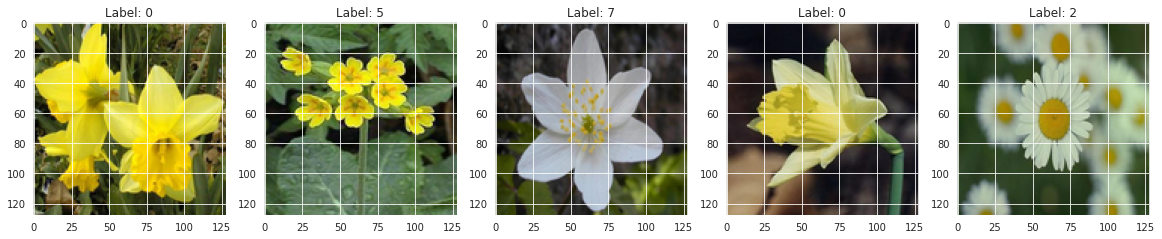

In [14]:
# Visualize the images along with their labels
def show_img(count, data, label):
  
    fig, axs = plt.subplots(1, count, figsize=(20, 16))
    for i in range(0, count):
        axs[i].imshow(data[i], label=label[i])
        axs[i].set_title('Label: {}'.format(label[i]))
    plt.show()
        
show_img(5, X, y1)

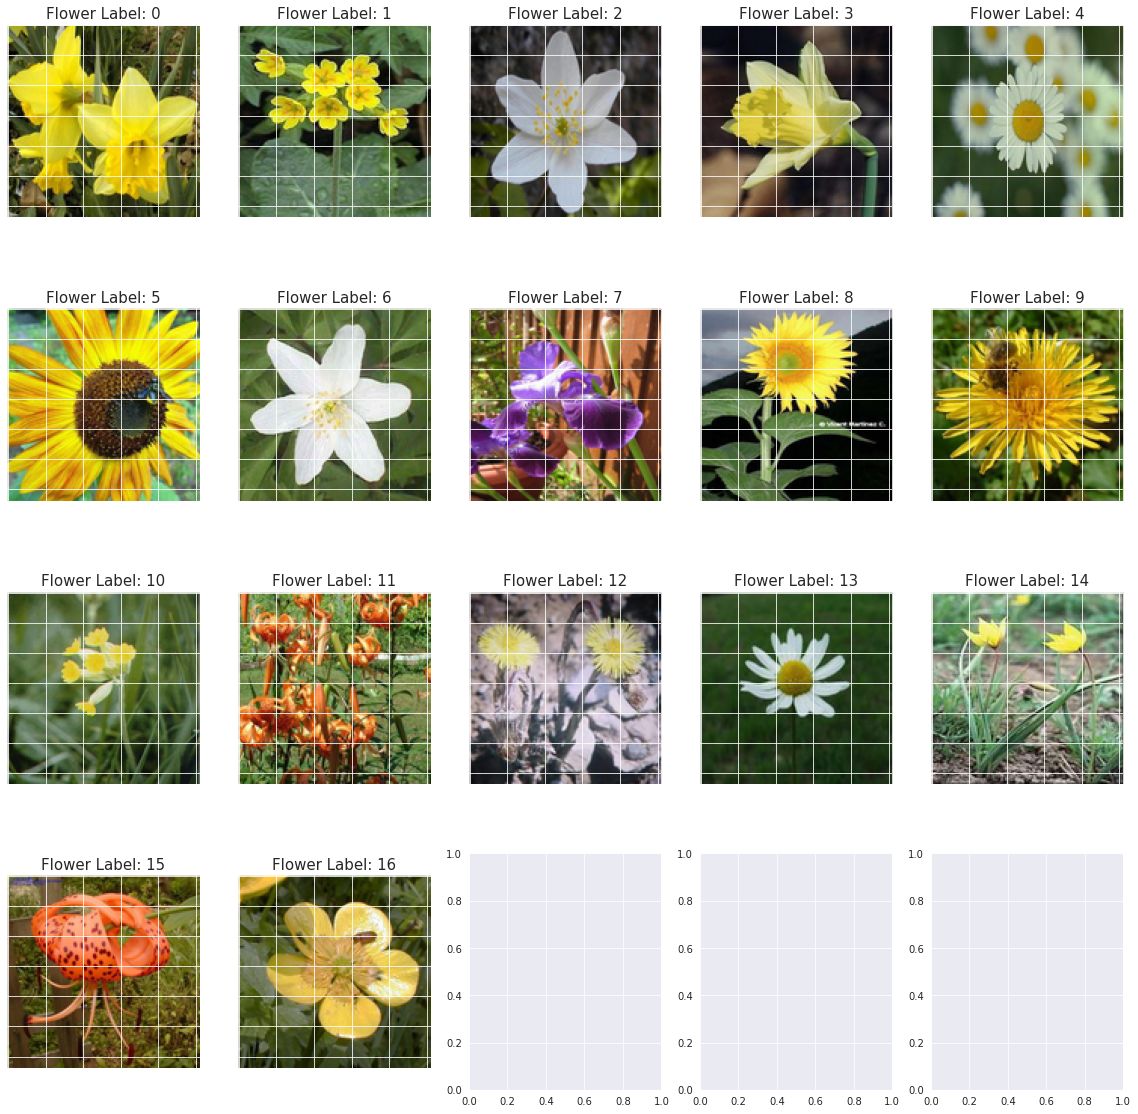

In [15]:
# Displaying an image from each class (Total classes = 17 with labels from 0 to 16)
cols = 5
rows = int(np.ceil(len(np.unique(y1))/cols))

fig, ax = plt.subplots(rows, cols, figsize=(20,20))
for i in np.unique(y1):
  col = i % 5
  row = int(i/5)

  ax[row][col].imshow(X[i])
  ax[row][col].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
  ax[row][col].set_title(f"Flower Label: {i}",{'fontsize':15})
plt.show() 

### 2B. Select any image from the dataset and assign it to a variable.

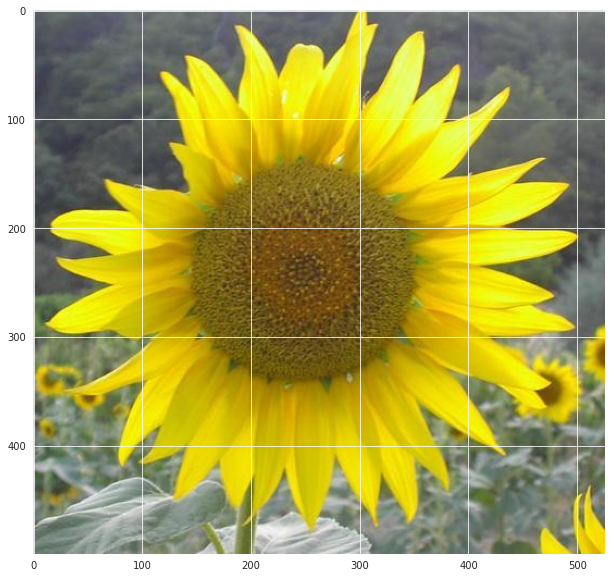

In [16]:
# Selecting an image from the dataset
path = '/content/17flowers/jpg/9/image_0721.jpg'

# Using the cv2_imshow
from google.colab.patches import cv2_imshow
img1 = cv2.imread(path, cv2.IMREAD_COLOR)
# cv2_imshow(img1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Using the imshow
plt.figure(figsize=(20, 10))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

### 2C. Transform the image into grayscale format and display the same.

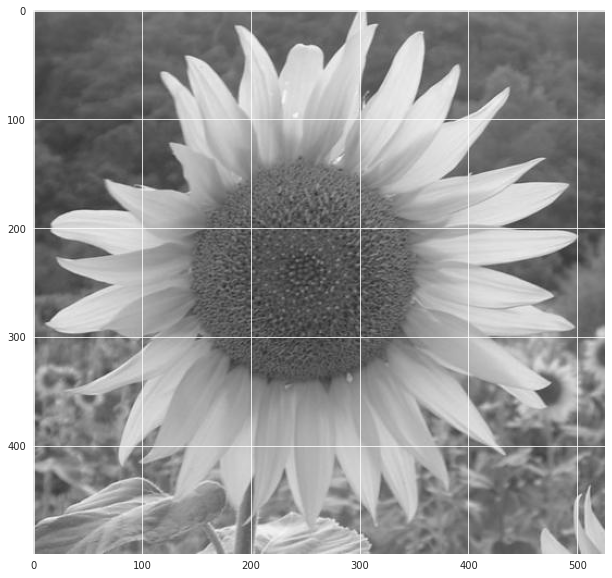

In [17]:
img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# cv2_imshow(img2)

# Using the imshow
plt.figure(figsize=(20, 10))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

### 2D. Apply a filter to sharpen the image and display the image before and after sharpening.

Text(0.5, 1.0, 'Sharpened Image')

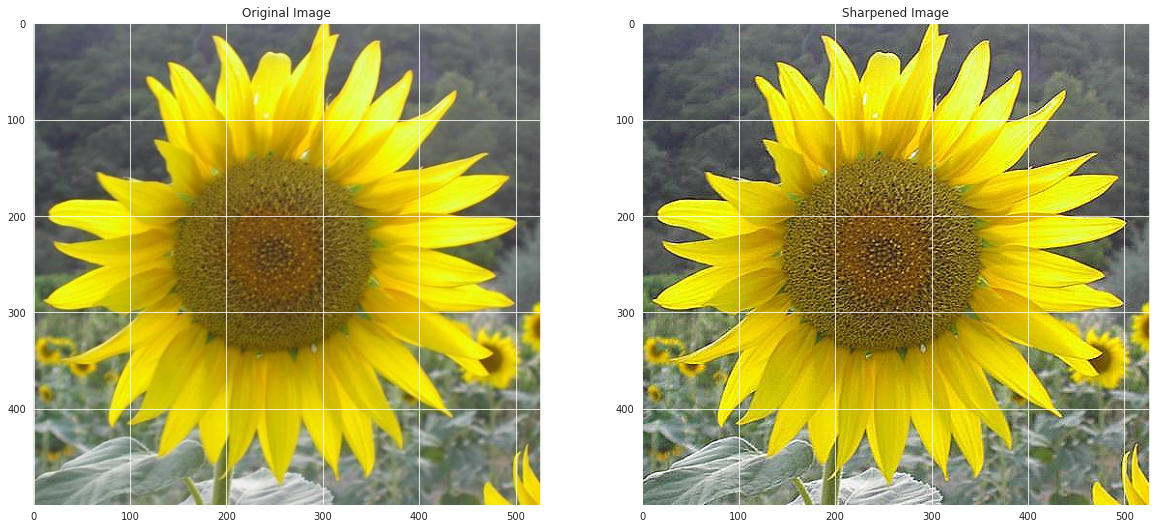

In [18]:
# # Original Image
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Sharpened Image
img3 = cv2.imread(path, cv2.IMREAD_COLOR)

kernel1 = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
img3 = cv2.filter2D(src=img3, ddepth=-1, kernel=kernel1)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
# cv2_imshow(img1)
# cv2_imshow(img3)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img1)
ax.set_title('Original Image')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img3)
ax.set_title('Sharpened Image')

### 2E. Apply a filter to blur the image and display the image before and after blur.

Text(0.5, 1.0, 'Blurred Image')

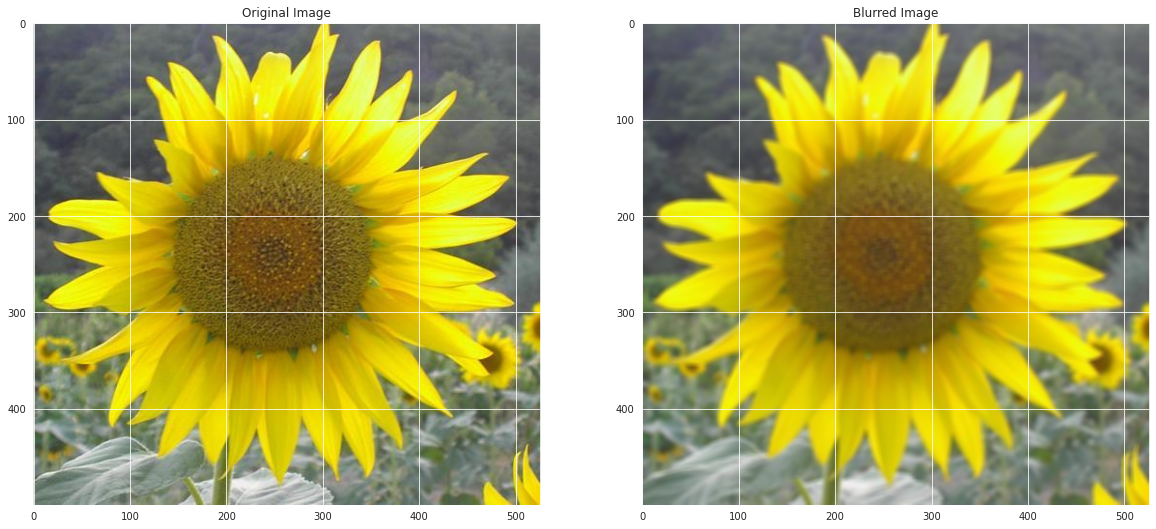

In [19]:
# # Original Image
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Sharpened Image
img4 = cv2.imread(path, cv2.IMREAD_COLOR)

img4 = cv2.blur(src=img4, ksize=(6,6))
img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
# cv2_imshow(img1)
# cv2_imshow(img4)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img1)
ax.set_title('Original Image')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img4)
ax.set_title('Blurred Image')

### 2F. Display all the 4 images from above questions besides each other to observe the difference.

Text(0.5, 1.0, 'Blurred Image')

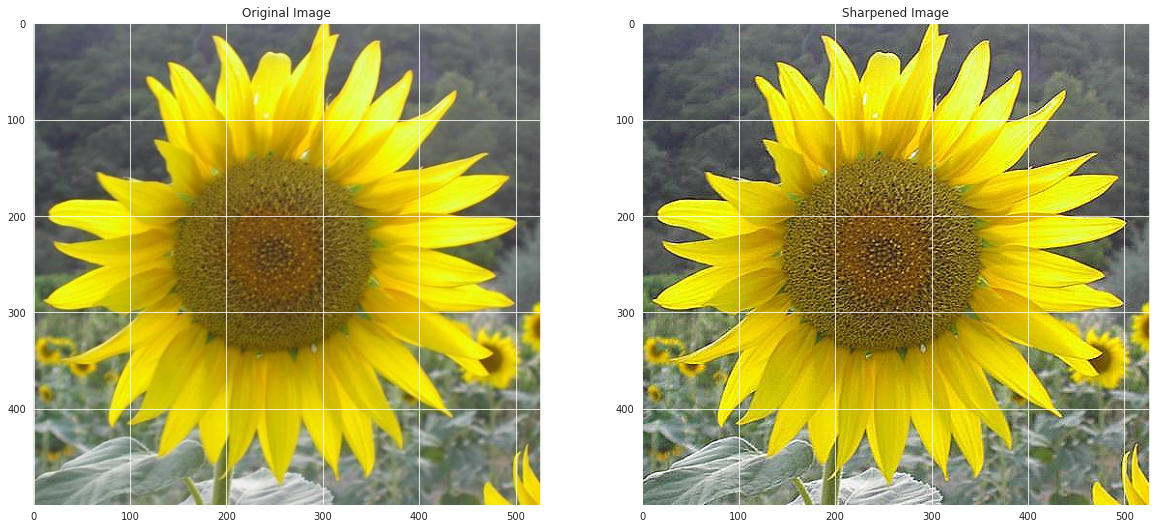

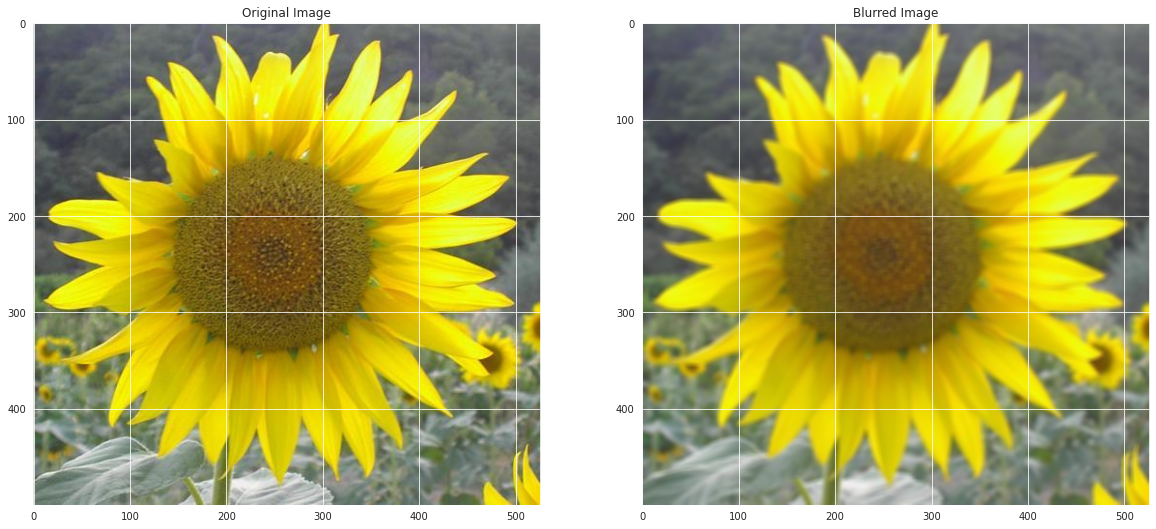

In [20]:
# Original Image and Sharpened Image
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img1)
ax.set_title('Original Image')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img3)
ax.set_title('Sharpened Image')

# Original Image and Blurred Image
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(img1)
ax.set_title('Original Image')

ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(img4)
ax.set_title('Blurred Image')

## 3. Model training and Tuning:

> Due to time constraint, I am using small number of epochs, and training only the selected models. Similar process can be replicated for other complex models (Model-4 and Model-5).

### 3A. Split the data into train and test with 80:20 proportion.

In [21]:
# Reshaping the data to train using the SVM
print(X.shape)
print(y.shape)

(1360, 128, 128, 3)
(1360, 17)


In [22]:
X1 = X.reshape(X.shape[0], 128 * 128 *3)
X1.shape

(1360, 49152)

In [23]:
y1

array([ 0,  5,  7, ..., 15,  4,  2])

In [24]:
y1[1]

5

In [25]:
y1.shape

(1360,)

In [26]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [27]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1088, 49152) (272, 49152)
(1088,) (272,)


### 3B. Train a model using any Supervised Learning algorithm and share performance metrics on test data.

In [28]:
# Using SVM from SkLearn
from sklearn.svm import SVC

In [29]:
#Create svm_model Object
model1 = SVC()

#Training the model
model1.fit(X_train, y_train)

#Predict testing set
y_pred = model1.predict(X_test)

Classification Accuracy:
Accuracy on Training data: 0.9200367647058824
Accuracy on Test data: 0.49264705882352944

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.71      0.51        14
           1       0.37      0.41      0.39        17
           2       0.64      0.60      0.62        15
           3       0.40      0.33      0.36        12
           4       0.59      0.62      0.61        16
           5       0.28      0.53      0.36        15
           6       0.42      0.36      0.38        14
           7       0.50      0.62      0.55        13
           8       0.88      0.44      0.58        16
           9       0.50      0.44      0.47        18
          10       0.37      0.35      0.36        20
          11       0.26      0.50      0.34        12
          12       0.76      0.65      0.70        20
          13       0.70      0.41      0.52        17
          14       0.33      0.14      0.20       

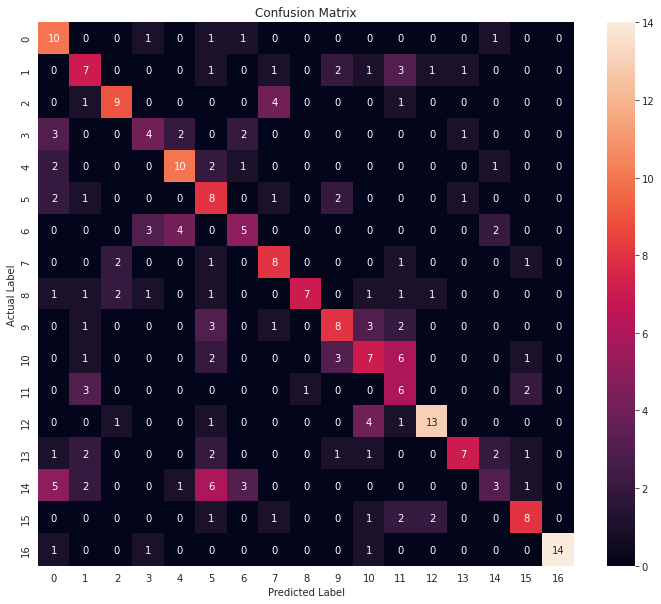

In [30]:
# Classification Accuracy
print("Classification Accuracy:")
print('Accuracy on Training data:',model1.score(X_train, y_train))
print('Accuracy on Test data:',model1.score(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']],  
                         columns = [i for i in ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Evaluation metrics allow us to estimate errors to determine how well our models are performing:**

> Accuracy: ratio of correct predictions over total predictions.

> Precision: how often the classifier is correct when it predicts positive.

> Recall: how often the classifier is correct for all positive instances.

> F-Score: single measurement to combine precision and recall.

**Considering the Class Recall, Precision, F1 Score and Accuracy as the most important parameters to decide the best model for this problem. We have the highest values in Model-3. Please refer the Model-3 for the same. (Part 3D)**

### 3C. Train a model using Neural Network and share performance metrics on test data.

In [31]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

In [32]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1088, 49152) (272, 49152)
(1088, 17) (272, 17)


In [33]:
model2 = Sequential()

model2.add(BatchNormalization())
model2.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model2.add(Dropout(0.4))

model2.add(BatchNormalization())
model2.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.4))

model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.4))

model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dropout(0.4))

model2.add(Dense(y_train.shape[1], activation = 'sigmoid'))

# Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model2.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [34]:
# Looking into our base model2
model2.build(X_train.shape)
model2.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  multiple                 196608    
 ormalization)                                                   
                                                                 
 dense (Dense)               multiple                  12583168  
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 batch_normalization_1 (Batc  multiple                 1024      
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             multiple                  32896     
                                                                 
 dropout_1 (Dropout)         multiple                  0

In [35]:
# Fit the model2
history2=model2.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=200, batch_size=200, verbose=2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/200
1088/1088 - 5s - loss: 3.5290 - acc: 0.0662 - val_loss: 6.4445 - val_acc: 0.0699 - 5s/epoch - 5ms/sample
Epoch 2/200
1088/1088 - 4s - loss: 3.2801 - acc: 0.0772 - val_loss: 4.0881 - val_acc: 0.0956 - 4s/epoch - 4ms/sample
Epoch 3/200
1088/1088 - 4s - loss: 3.1104 - acc: 0.1066 - val_loss: 3.3113 - val_acc: 0.1176 - 4s/epoch - 4ms/sample
Epoch 4/200
1088/1088 - 4s - loss: 3.0335 - acc: 0.0974 - val_loss: 2.9747 - val_acc: 0.1618 - 4s/epoch - 4ms/sample
Epoch 5/200
1088/1088 - 4s - loss: 2.9799 - acc: 0.1029 - val_loss: 2.7804 - val_acc: 0.1728 - 4s/epoch - 4ms/sample
Epoch 6/200
1088/1088 - 5s - loss: 2.9089 - acc: 0.1268 - val_loss: 2.6525 - val_acc: 0.2059 - 5s/epoch - 5ms/sample
Epoch 7/200
1088/1088 - 4s - loss: 2.7700 - acc: 0.1452 - val_loss: 2.5820 - val_acc: 0.2059 - 4s/epoch - 4ms/sample
Epoch 8/200
1088/1088 - 4s - loss: 2.8462 - acc: 0.1425 - val_loss: 2.5470 - val_acc: 0.2059 - 4s/epoch - 4ms/sample
Epoch 9/200
1088/

In [36]:
# predicting the model2 on test data
y_pred=model2.predict(X_test)

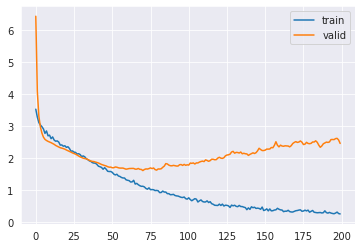

In [37]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# Printing results
results = model2.evaluate(X_test, y_test)

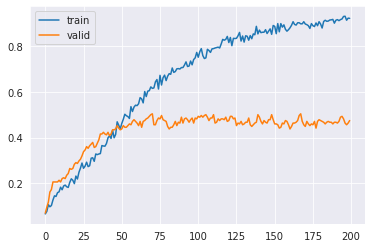

In [38]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.legend(("train" , "valid") , loc =0)

# Printing results
results = model2.evaluate(X_test, y_test)

Classification Accuracy:
Loss and Accuracy on Training data: [0.009807920562760794, 0.9990809]
Loss and Accuracy on Test data: [2.454698555609759, 0.4742647]

Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.57      0.31        14
           1       0.38      0.18      0.24        17
           2       0.73      0.73      0.73        15
           3       0.75      0.25      0.38        12
           4       0.54      0.44      0.48        16
           5       0.13      0.13      0.13        15
           6       0.41      0.50      0.45        14
           7       0.67      0.62      0.64        13
           8       0.60      0.56      0.58        16
           9       0.59      0.56      0.57        18
          10       0.29      0.30      0.29        20
          11       0.40      0.50      0.44        12
          12       0.74      0.70      0.72        20
          13       0.67      0.35      0.46        17
      

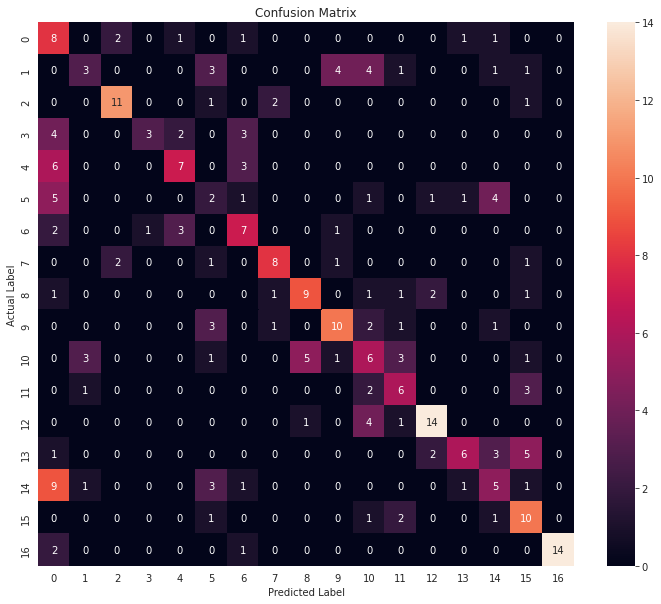

In [39]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model2.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model2.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']],  
                         columns = [i for i in ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### 3D. Train a model using a basic CNN and share performance metrics on test data.

In [40]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1088, 128, 128, 3) (272, 128, 128, 3)
(1088, 17) (272, 17)


In [42]:
generator = ImageDataGenerator(rotation_range = 180,
                               zoom_range = 0.2,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True)
generator.fit(X_train)

In [43]:
model3 = Sequential()

model3.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(128, 128, 3), activation='relu'))
model3.add(MaxPool2D((2, 2)))
# model3.add(Dropout(0.25))

model3.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model3.add(MaxPool2D((2, 2)))
# model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
# model3.add(Dropout(0.25))

model3.add(Dense(64, activation='relu'))
# model3.add(Dropout(0.25))

model3.add(Dense(17, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 115200)            0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [44]:
history3 = model3.fit(generator.flow(X_train,y_train, batch_size=200), epochs=100, verbose=2, shuffle=True, validation_data=(X_test,y_test))
pd.DataFrame(history3.history)

Epoch 1/100
6/6 - 70s - loss: 3.3924 - acc: 0.0717 - val_loss: 2.7450 - val_acc: 0.0662 - 70s/epoch - 12s/step
Epoch 2/100
6/6 - 65s - loss: 2.7315 - acc: 0.0680 - val_loss: 2.6359 - val_acc: 0.0882 - 65s/epoch - 11s/step
Epoch 3/100
6/6 - 63s - loss: 2.6147 - acc: 0.1094 - val_loss: 2.4474 - val_acc: 0.1471 - 63s/epoch - 10s/step
Epoch 4/100
6/6 - 67s - loss: 2.4862 - acc: 0.1324 - val_loss: 2.2456 - val_acc: 0.2426 - 67s/epoch - 11s/step
Epoch 5/100
6/6 - 62s - loss: 2.3572 - acc: 0.1857 - val_loss: 2.1577 - val_acc: 0.2610 - 62s/epoch - 10s/step
Epoch 6/100
6/6 - 65s - loss: 2.2333 - acc: 0.2601 - val_loss: 1.9936 - val_acc: 0.2904 - 65s/epoch - 11s/step
Epoch 7/100
6/6 - 63s - loss: 2.1573 - acc: 0.2693 - val_loss: 1.8763 - val_acc: 0.3787 - 63s/epoch - 10s/step
Epoch 8/100
6/6 - 62s - loss: 2.0143 - acc: 0.3447 - val_loss: 1.7254 - val_acc: 0.3897 - 62s/epoch - 10s/step
Epoch 9/100
6/6 - 70s - loss: 1.9153 - acc: 0.3529 - val_loss: 1.6644 - val_acc: 0.4081 - 70s/epoch - 12s/step
E

loss       acc  val_loss   val_acc
0   3.392384  0.071691  2.745038  0.066176
1   2.731488  0.068015  2.635865  0.088235
2   2.614685  0.109375  2.447363  0.147059
3   2.486161  0.132353  2.245599  0.242647
4   2.357225  0.185662  2.157732  0.261029
..       ...       ...       ...       ...
95  0.577338  0.809743  1.073848  0.683824
96  0.582457  0.789522  1.020297  0.702206
97  0.627347  0.787684  1.069094  0.672794
98  0.683557  0.753676  0.998365  0.661765
99  0.649371  0.762868  1.013515  0.658088

[100 rows x 4 columns]

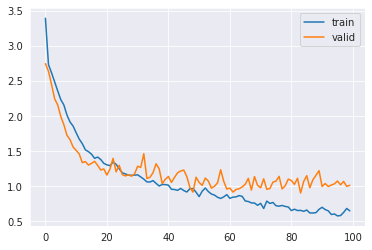

In [45]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# Printing results
results = model3.evaluate(X_test, y_test)

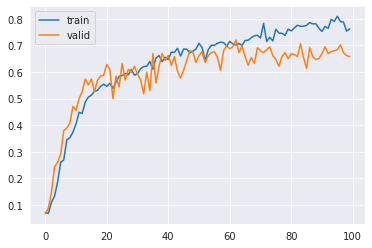

In [46]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history3.history)
hist['epoch'] = history3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['acc'])
plt.plot(hist['val_acc'])
plt.legend(("train" , "valid") , loc =0)

# Printing results
results = model3.evaluate(X_test, y_test)

In [47]:
y_pred=model3.predict(X_test)
y_pred

array([[1.4936901e-16, 6.7635947e-13, 4.2394110e-16, ..., 6.8027917e-11,
        9.9985242e-01, 6.5962971e-11],
       [1.9952194e-10, 1.0247657e-04, 2.7318805e-09, ..., 5.2767390e-08,
        6.1428007e-05, 7.0166854e-12],
       [2.4238729e-04, 7.6894343e-01, 2.7806822e-03, ..., 5.2442710e-04,
        2.0040004e-03, 6.9570166e-10],
       ...,
       [1.3448957e-04, 2.0539731e-01, 1.9265990e-06, ..., 2.2757968e-05,
        6.3296938e-03, 2.5160843e-10],
       [4.4570473e-04, 1.0192490e-06, 8.4318322e-01, ..., 6.7324567e-05,
        1.6037774e-06, 1.6794175e-08],
       [1.5384281e-08, 5.1876251e-04, 3.1278800e-05, ..., 3.2141128e-07,
        3.1305814e-01, 2.0987597e-11]], dtype=float32)

Classification Accuracy:
Loss and Accuracy on Training data: [0.536414310336113, 0.7977941]
Loss and Accuracy on Test data: [1.0471456576796139, 0.6580882]

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.64      0.51        14
           1       0.64      0.82      0.72        17
           2       1.00      0.67      0.80        15
           3       0.39      0.75      0.51        12
           4       0.52      0.81      0.63        16
           5       0.43      0.67      0.53        15
           6       0.78      0.50      0.61        14
           7       0.71      0.77      0.74        13
           8       0.67      0.50      0.57        16
           9       0.92      0.61      0.73        18
          10       0.80      0.80      0.80        20
          11       0.43      0.75      0.55        12
          12       0.83      0.50      0.62        20
          13       1.00      0.88      0.94        17
        

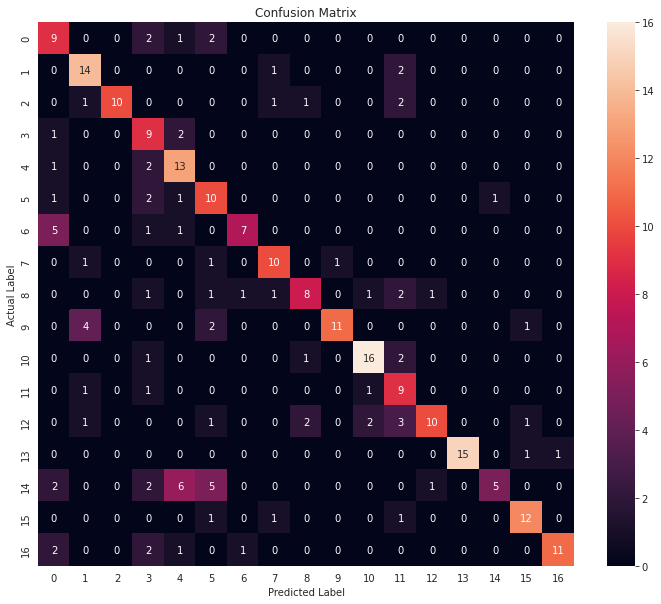

In [48]:
# Classification Accuracy
print("Classification Accuracy:")
print('Loss and Accuracy on Training data:',model3.evaluate(X_train, y_train))
print('Loss and Accuracy on Test data:',model3.evaluate(X_test, y_test))
print()

# Classification Report
print("Classification Report:\n",classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
df_cm = pd.DataFrame(cm, index = [i for i in ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']],  
                         columns = [i for i in ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### 3E. Predict the class/label of image ‘Prediction.jpg’ using best performing model and share predicted label.

In [49]:
# Function to read images from the given path and predict the image class
import matplotlib.image as mpimg
import keras.utils as image

def imagepredict(path):
    img=mpimg.imread(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    # Prediction
    img = image.load_img(path, target_size=(128, 128))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x.astype('float32')/255
    pred = np.argmax(model3.predict(x))
    print()
    print("Predicted Class of the above image is: {}.".format(pred))

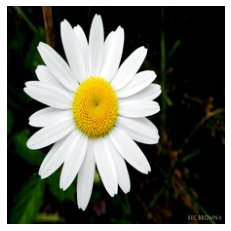


Predicted Class of the above image is: 2.


In [50]:
path = '/content/drive/MyDrive/MGL/Project-CV-1/Prediction.jpg'
imagepredict(path)

Actual Class: [1]
Predicted Class: [1]



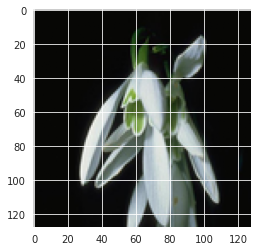

In [68]:
# Using test images from the given dataset
# Test Image as n1
n1 = 21
plt.imshow(X_test[n1])

# y_pred=model1.predict(X_test)

# Actual Class
print("Actual Class:",[y_test.argmax(axis=1)[n1]])
# Predicted Class
print("Predicted Class:",[y_pred.argmax(axis=1)[n1]])
print()

**Additional Models; Not part of the Project Part-B:**

### CNN with VGG-16
- Flatten
- 2 dense layers (256, activation='relu')
- Dropout(0.5)
- loss='categorical_crossentropy', optimizer='adam'
- model compile with ImageDataGenerator to minimize overfitting.
- shuffle = True

In [52]:
# generator = ImageDataGenerator(rotation_range = 180,
#                                zoom_range = 0.2,
#                                width_shift_range = 0.2,
#                                height_shift_range = 0.2,
#                                horizontal_flip = True,
#                                vertical_flip = True)
# generator.fit(X_train)

In [53]:
# from keras.applications.vgg16 import VGG16

# # Initialize the VGG-16 model
# # Remove the final layer of the model and add 12 classess of plant seedlings
# # Input images: 128px by 128px.

# prior_model = VGG16(weights='imagenet',include_top=False, input_shape=(128,128,3))

# # Lets create our model

# model4 = Sequential()

# # Here we add a all the VGG16 as a layer

# model4.add(prior_model)

In [54]:
# model4.summary()

In [55]:
# model4.layers[0].summary()

In [56]:
# model4.add(Flatten())
# model4.add(Dense(256,activation='relu'))
# model4.add(Dropout(0.5))
# model4.add(Dense(17, activation='softmax'))

In [57]:
# model4.summary()

In [58]:
# # Looping over each layers in layer 0 to freeze them
# for layers in model4.layers[0].layers: 
#   layers.trainable = False

# # Freezing layer 0 as well for good measure
# model4.layers[0].trainable = False 

In [59]:
# model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
# history4 = model4.fit(generator.flow(X_train,y_train,batch_size=300), epochs=100, verbose=2, shuffle=True, validation_data=(X_test,y_test))
# pd.DataFrame(history4.history)

### CNN with InceptionV3
- Flatten
- 2 dense layers (1024, activation='relu')
- Dropout(0.5)
- loss='categorical_crossentropy', optimizer='adam'
- model compile with ImageDataGenerator to minimize overfitting.
- shuffle = True

In [61]:
# from keras.applications.inception_v3 import InceptionV3

# # Initialize the InceptionV3 model
# # Remove the final layer of the model and add 12 classess of plant seedlings
# # Input images: 128px by 128px.

# prior_model = InceptionV3(weights='imagenet',include_top=False, input_shape=(128,128,3))

# # Lets create our model

# model5 = Sequential()

# # Here we add a all the InceptionV3 as a layer

# model5.add(prior_model)

In [62]:
# model5.summary()

In [63]:
# model5.layers[0].summary()

In [64]:
# model5.add(Flatten())

# model5.add(Dense(1024, activation='relu'))
# model5.add(Dropout(0.5))

# model5.add(Dense(17, activation='softmax'))

# model5.summary()

In [65]:
# # Looping over each layers in layer 0 to freeze them
# for layers in model5.layers[0].layers: 
#   layers.trainable = False

# # freezing layer 0 as well for good measure
# model5.layers[0].trainable = False 

In [66]:
# model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# history5 = model5.fit(generator.flow(X_train,y_train,batch_size=300), epochs=100, verbose=2,shuffle=True,validation_data=(X_test,y_test))
# pd.DataFrame(history5.history)

# References:

1. [Towards Data Science](https://towardsdatascience.com)
2. [Kaggle. Kaggle Code](https://www.kaggle.com/code)
3. [KdNuggets](https://www.kdnuggets.com/)
4. [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/)
5. [Wikipedia](https://en.wikipedia.org/)
6. [Numpy](https://numpy.org/)
7. [Pandas](https://pandas.pydata.org/)
8. [SciPy](https://scipy.org/)
9. [MatplotLib](https://matplotlib.org/)
10. [Seaborn](https://seaborn.pydata.org/)
11. [Python](https://www.python.org/)
12. [Plotly](https://plotly.com/)
13. [Bokeh](https://docs.bokeh.org/en/latest/)
14. [RStudio](https://www.rstudio.com/)
15. [MiniTab](https://www.minitab.com/en-us/)
16. [Anaconda](https://www.anaconda.com/)
17. [PapersWithCode](https://paperswithcode.com/)